# Test on the Voronoi Statistics 

#### (Figure 2)

We apply the 3 Voronoi tests we developed, to use on 34 samples grown in natural environment. We access the test performance of hydathode and veins, against the 3 reference point sets.

In [91]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
from matplotlib import pyplot as plt
from statannot import add_stat_annotation
from matplotlib.collections import LineCollection
from scipy.spatial import Voronoi

# bayesian inference modules
import bambi as bmb 
import arviz as az

# local modules
import sys
sys.path.insert(0, '../') 
import graph_create, voronoi_local, jaccard_similarity, center_predict


-------

## Read in all sample graphs from the control condition

In [3]:
dot_folder = f'../data/natural/natural_dots_all'
vein_folder = f'../data/natural/natural_txt_all'
samples = pd.read_csv('../data/natural/natural_all.csv', delimiter=',', header = None)
sample_list = samples[0].tolist()

In [4]:
def shape_dfs(data_arr, value_name = 'error'):
    
    'helper function to make dataframe'
    
    mean_df = pd.DataFrame(data_arr, index = sample_list, columns = ['hydathode','centroid','mid-point','random'])
    mean_df['plant'] = samples[1].tolist()
    mean_df['sample'] = mean_df.index

    melted_mean_df = mean_df.melt(id_vars= ['sample', 'plant'] , var_name='type', value_name= value_name)
    melted_mean_df["type"]  = pd.Categorical(melted_mean_df["type"].tolist(), categories = ['hydathode','centroid','mid-point','random'], ordered=True)

    return mean_df, melted_mean_df

-------

## Voronoi I Test

In [7]:
angle_mean_arr = np.zeros([34,4])
dist_mean_arr = np.zeros([34,4])

In [8]:
def local_error(sample):

    'helper function to streamline the Voronoi I test for a single sample'
    
    G = graph_create.graph_creation(sample, dot_folder= dot_folder, vein_folder = vein_folder)

    print('Perform local tests... \n')
    # local tests:
    adj_faces_mat, shared_edges_mat = voronoi_local.shared_edges(G, threshold = 50)
    rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat,G.graph['dots_passed'], G, dot_bool = True)

    # baseline local tests:
    cent_in_faces, mid_in_faces, rand_in_faces = voronoi_local.random_n_centroid(G)    
    centroid_rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat, cent_in_faces)
    midpoint_rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat ,mid_in_faces)
    random_rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat, rand_in_faces)

    _ = graph_create.make_dual(G, cent_in_faces, mid_in_faces, rand_in_faces, rst[0])

    baseline_summary = pd.DataFrame(np.array([rst[2].iloc[0].tolist(), centroid_rst[2].iloc[0].tolist(), midpoint_rst[2].iloc[0].tolist(), random_rst[2].iloc[0].tolist()]), 
                                    columns = ['angle_mean', 'angle_std', 'dist_mean', 'dist_std'],
                                    index = ['dot', 'centroid', 'midpoint','random'])

    angle_list = [baseline_summary['angle_mean'][0],
                        baseline_summary['angle_mean'][1],
                        baseline_summary['angle_mean'][2],
                        baseline_summary['angle_mean'][3]]

    dist_list = [baseline_summary['dist_mean'][0],
                        baseline_summary['dist_mean'][1],
                        baseline_summary['dist_mean'][2],
                        baseline_summary['dist_mean'][3]]

    print('Local tests done! \n')

    return angle_list, dist_list, rst[1].shape[0], len(G.graph['dots_passed'])


In [9]:
for i, sample in enumerate(sample_list):
    angle_list, dist_list, num_pair, num_face = local_error(sample)
    angle_mean_arr[i] = angle_list
    dist_mean_arr[i] = dist_list

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Grap

../voronoi_local.py:24: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
../voronoi_local.py:24: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
../voronoi_local.py:24: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
../voronoi_local.py:24: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracin

In [10]:
_, melted_angle_mean_df = shape_dfs(angle_mean_arr, value_name = 'error')

#### Bayesian Linear Mixed Effects Models

Since all leaf samples we use comes from 6 plants, different plants might contribute to the varibilities in Voronoi statistics.

Therefore, we introduce plant as a variable in potentially explaining the variations in the Voronoi test performance. We choose to use Bayesian Linear Mixed Effects Models to distangle the random effects (called `Group-level effects` in the model description) coming from plants.

We will use this approach for all Voronoi I-III tests.

In [11]:
# Bayesian mixture model
angle_model= bmb.Model("error ~ type + (1|plant)", melted_angle_mean_df, dropna=True, categorical = "type")
angle_model

Formula: error ~ type + (1|plant)
Family name: Gaussian
Link: identity
Observations: 136
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 12.1071, sigma: 18.0397)
    type ~ Normal(mu: [0. 0. 0.], sigma: [29.4587 29.4587 29.4587])

  Group-level effects
    1|plant ~ Normal(mu: 0, sigma: HalfNormal(sigma: 18.0397))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 5.1024)

In [12]:
angle_results =angle_model.fit(chains=5, draws=2000)

Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 56 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7204, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7133, but should be close to 0.8. Try to increase the number of tuning steps.


In [16]:
angle_results

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [17]:
az.summary(angle_results)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,8.244,0.431,7.430,9.061,0.008,0.005,3322.0,3646.0,1.0
type[centroid],1.113,0.453,0.270,1.973,0.007,0.005,4662.0,6011.0,1.0
type[mid-point],2.416,0.452,1.565,3.275,0.006,0.004,5266.0,6083.0,1.0
type[random],11.958,0.457,11.084,12.808,0.006,0.005,5106.0,6433.0,1.0
1|plant_sigma,0.647,0.403,0.000,1.339,0.009,0.007,2035.0,2301.0,1.0
error_sigma,1.874,0.118,1.669,2.104,0.002,0.001,6052.0,5871.0,1.0
1|plant[1],0.360,0.421,-0.336,1.223,0.007,0.005,4118.0,4836.0,1.0
1|plant[2],0.496,0.452,-0.246,1.395,0.007,0.005,3967.0,4934.0,1.0
1|plant[3],-0.574,0.477,-1.464,0.221,0.008,0.006,3426.0,4846.0,1.0
1|plant[4],-0.009,0.416,-0.839,0.782,0.006,0.005,4631.0,4371.0,1.0


#### Plot the inferred mean and 95% confidence interval:

In [20]:
slopes = angle_results.posterior.type.values
intercept = angle_results.posterior.Intercept.values
intercept = intercept.reshape((5,2000,1)) 

In [23]:
# set plotting colors scheme for plotting 
sns.color_palette("rocket_r")
sns.set_style("white")
order = ['hydathode', 'centroid', 'mid-point', 'random']
colors = ['chocolate', sns.color_palette("rocket_r")[3], sns.color_palette("rocket_r")[4], sns.color_palette("rocket_r")[5]]
palette = dict(zip(order, colors))

In [22]:
pvalues = [(slopes[:,:,0] <= 0).sum()/10000, (slopes[:,:,1] <= 0).sum()/10000, (slopes[:,:,2] <= 0).sum()/10000]
pairs = [('hydathode', 'centroid'), ('hydathode', 'mid-point'), ('hydathode', 'random')]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

hydathode v.s. centroid: Custom statistical test, P_val:8.000e-03
hydathode v.s. mid-point: Custom statistical test, P_val:0.000e+00
hydathode v.s. random: Custom statistical test, P_val:0.000e+00


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


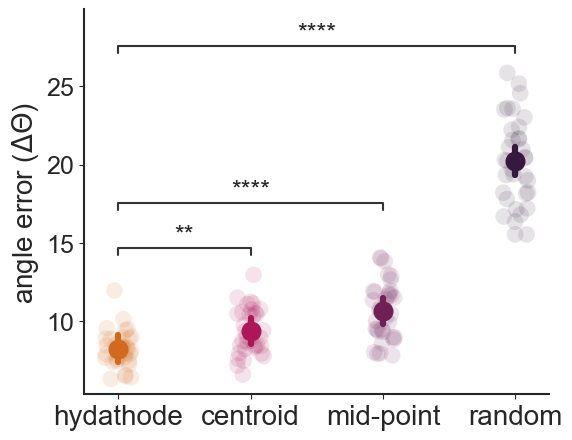

In [26]:
# plotting the subfigure for Voronoi I- angle error:
fig, ax = plt.subplots(figsize = (6,5))

sns.stripplot (x = 'type', y = 'error', data = melted_angle_mean_df, order = order, 
               palette = palette,
               alpha = .12, size = 12, zorder=1,
               ax = ax)


ax, test_results = add_stat_annotation(ax, data = melted_angle_mean_df, x= 'type', y= 'error', order = order,
                    box_pairs = pairs,
                    perform_stat_test = False,
                    pvalues = pvalues,
                    loc='inside',
                    fontsize = 18)

# add foreground inferred information
x = list(range(4))

y_lower = [np.percentile(a = intercept, q = 2.5)] + np.percentile(a = slopes + intercept, axis = [0,1], q = 2.5).tolist()
y_higher = [np.percentile(a = intercept, q = 97.5)] + np.percentile(a = slopes + intercept, axis = [0,1], q = 97.5).tolist()
y = [az.summary(angle_results)['mean']['Intercept'],
           az.summary(angle_results)['mean']['Intercept'] + az.summary(angle_results)['mean']['type[centroid]'],
           az.summary(angle_results)['mean']['Intercept'] + az.summary(angle_results)['mean']['type[mid-point]'],
           az.summary(angle_results)['mean']['Intercept'] + az.summary(angle_results)['mean']['type[random]']]

for i in range(4):
    ax.plot([x[i], x[i]], [y_lower[i], y_higher[i]],  c = colors[i], lw = 4.5)
for i in range(4):
    ax.scatter(x[i], y[i],  c = colors[i], s = 180, zorder = 2)

    
ax.set_xticklabels(['hydathode', 'centroid', 'mid-point', 'random'], fontsize = 20)
ax.set_xlabel(None)
ax.set_ylabel('angle error ($\Delta \Theta$) ', fontsize = 20)
ax.set_yticks([10, 15, 20, 25])
ax.set_yticklabels(labels = [10, 15, 20, 25], fontsize = 18)

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.setp(ax.spines.values(), linewidth=1.5)


plt.show()

In [28]:
_, melted_dist_mean_df = shape_dfs(dist_mean_arr, value_name = 'error')

In [29]:
dist_model= bmb.Model("error ~ type + (1|plant)", melted_dist_mean_df, dropna=True, categorical = "type")
dist_results =dist_model.fit(chains=5, draws=2000)

Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 65 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 814 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.1996, but should be close to 0.8. Try to increase the number of tuning steps.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


In [30]:
dist_results

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [31]:
az.summary(dist_results)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.126,0.012,0.101,0.142,0.004,0.003,15.0,23.0,1.24
type[centroid],0.084,0.007,0.070,0.098,0.000,0.000,2292.0,5501.0,1.16
type[mid-point],0.109,0.007,0.095,0.122,0.000,0.000,4184.0,3615.0,1.07
type[random],0.272,0.007,0.258,0.285,0.001,0.001,51.0,5574.0,1.06
1|plant_sigma,0.020,0.022,0.000,0.076,0.008,0.006,14.0,2939.0,1.25
error_sigma,0.031,0.002,0.028,0.034,0.000,0.000,2311.0,5463.0,1.05
1|plant[1],0.012,0.013,-0.003,0.043,0.004,0.004,15.0,32.0,1.23
1|plant[2],0.003,0.011,-0.014,0.027,0.004,0.003,14.0,46.0,1.25
1|plant[3],0.009,0.011,-0.005,0.037,0.003,0.003,16.0,42.0,1.22
1|plant[4],0.006,0.012,-0.009,0.033,0.004,0.003,14.0,96.0,1.26


In [32]:
slopes = dist_results.posterior.type.values
intercept = dist_results.posterior.Intercept.values
intercept = intercept.reshape((5,2000,1))

In [33]:
pvalues = [(slopes[:,:,0] <= 0).sum()/10000, (slopes[:,:,1] <= 0).sum()/10000, (slopes[:,:,2] <= 0).sum()/10000]
pairs = [('hydathode', 'centroid'), ('hydathode', 'mid-point'), ('hydathode', 'random')]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

hydathode v.s. centroid: Custom statistical test, P_val:0.000e+00
hydathode v.s. mid-point: Custom statistical test, P_val:0.000e+00
hydathode v.s. random: Custom statistical test, P_val:0.000e+00


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


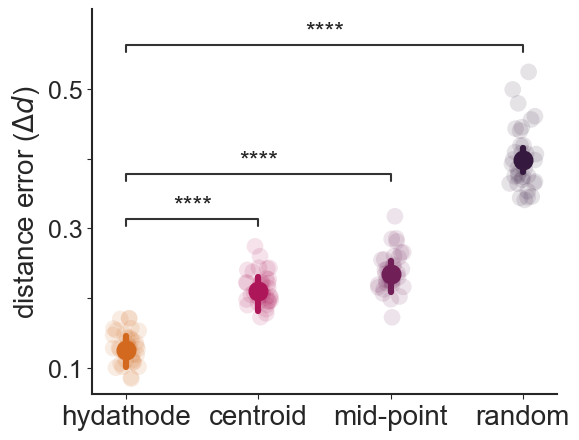

In [36]:
# plotting the subfigure for Voronoi I- distance error:

fig, ax = plt.subplots(figsize = (6,5))

sns.stripplot (x = 'type', y = 'error', data = melted_dist_mean_df, order = order, 
               palette = palette,
               alpha = .12, size = 12, zorder=1,
               ax = ax)


ax, test_results = add_stat_annotation(ax, data = melted_dist_mean_df, x= 'type', y= 'error', order = order,
                    box_pairs = pairs,
                    perform_stat_test = False,
                    pvalues = pvalues,
                    loc='inside',
                    fontsize = 18)

x = list(range(4))

y_lower = [np.percentile(a = intercept, q = 2.5)] + np.percentile(a = slopes + intercept, axis = [0,1], q = 2.5).tolist()
y_higher = [np.percentile(a = intercept, q = 97.5)] + np.percentile(a = slopes + intercept, axis = [0,1], q = 97.5).tolist()
y = [az.summary(dist_results)['mean']['Intercept'],
           az.summary(dist_results)['mean']['Intercept'] + az.summary(dist_results)['mean']['type[centroid]'],
           az.summary(dist_results)['mean']['Intercept'] + az.summary(dist_results)['mean']['type[mid-point]'],
           az.summary(dist_results)['mean']['Intercept'] + az.summary(dist_results)['mean']['type[random]']]
for i in range(4):
    ax.plot([x[i], x[i]], [y_lower[i], y_higher[i]],  c = colors[i], lw = 4.5)
for i in range(4):
    ax.scatter(x[i], y[i],  c = colors[i], s = 180, zorder = 2)

    
# ax.set_title('Voronoi I: angle test (n = 34)', fontsize = 15)
ax.set_xticklabels(['hydathode', 'centroid', 'mid-point', 'random'], fontsize = 20)
ax.set_xlabel(None)
ax.set_ylabel('distance error ($\Delta d$)', fontsize = 20)
ax.set_yticks([.1, .2, .3, .4, .5])
ax.set_yticklabels(labels = [.1, None, .3, None, .5], fontsize = 18)


# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.setp(ax.spines.values(), linewidth=1.5)

plt.show()

-------

## Voronoi II test

In [43]:
J_mean_arr = np.zeros([34,4])

In [44]:
def spatial_overlap(sample):
    
    'helper function to streamline the Voronoi II test for a single sample'

    G = graph_create.graph_creation(sample, dot_folder= dot_folder, vein_folder= vein_folder)

    seeds = [n for n in G.nodes if G.nodes[n]['type'] != 'vein']
    vor = Voronoi(seeds)
    bounded_regions = jaccard_similarity.bounded_polygons(G, vor)
    J_list = jaccard_similarity.overlap_test(G, seeds, bounded_regions)

    print(f'start area test for {sample}  \n')


    centroid_seeds, midpoint_seeds, random_seeds = jaccard_similarity.hybrid_seeds(G)

    centroid_vor = Voronoi(centroid_seeds)
    midpoint_vor =  Voronoi(midpoint_seeds)
    random_vor = Voronoi(random_seeds)

    centroid_bounded_regions = jaccard_similarity.bounded_polygons(G, centroid_vor)
    midpoint_bounded_regions = jaccard_similarity.bounded_polygons(G, midpoint_vor)
    random_bounded_regions = jaccard_similarity.bounded_polygons(G, random_vor)

    centroid_J_list = jaccard_similarity.overlap_test(G, seeds, centroid_bounded_regions)
    midpoint_J_list = jaccard_similarity.overlap_test(G, seeds, midpoint_bounded_regions)
    random_J_list = jaccard_similarity.overlap_test(G, seeds, random_bounded_regions)

    print(f'Finish area test. \n')

    return J_list.mean(), centroid_J_list.mean(), midpoint_J_list.mean(), random_J_list.mean()

In [45]:
for i, sample in enumerate(sample_list):
    J_mean_arr[i] = spatial_overlap(sample)

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

start area test for N1-1  

Finish area test. 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

start area test for N1-2  

Finish area test. 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

start area test for N1-3  

Finish area test. 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces

In [46]:
_, melted_J_mean_df = shape_dfs(J_mean_arr, value_name = 'error')

In [47]:
# Bayesian mixture model
J_model= bmb.Model("error ~ type + (1|plant)", melted_J_mean_df, dropna=True, categorical = "type")
J_results =J_model.fit(chains=5, draws=2000)

Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 61 seconds.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7016, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


In [48]:
J_results

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [49]:
az.summary(J_results)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.716,0.006,0.704,0.728,0.0,0.0,2990.0,2108.0,1.0
type[centroid],-0.051,0.007,-0.064,-0.037,0.0,0.0,5325.0,5170.0,1.0
type[mid-point],-0.080,0.007,-0.093,-0.067,0.0,0.0,5211.0,5617.0,1.0
type[random],-0.241,0.007,-0.254,-0.227,0.0,0.0,5270.0,5492.0,1.0
1|plant_sigma,0.007,0.005,0.000,0.017,0.0,0.0,1655.0,2979.0,1.0
error_sigma,0.029,0.002,0.026,0.033,0.0,0.0,5981.0,5621.0,1.0
1|plant[1],0.001,0.005,-0.009,0.011,0.0,0.0,4312.0,2945.0,1.0
1|plant[2],-0.003,0.006,-0.014,0.007,0.0,0.0,3384.0,2610.0,1.0
1|plant[3],0.006,0.007,-0.003,0.019,0.0,0.0,3175.0,4385.0,1.0
1|plant[4],-0.002,0.005,-0.013,0.008,0.0,0.0,4354.0,3752.0,1.0


In [50]:
slopes = J_results.posterior.type.values
intercept = J_results.posterior.Intercept.values
intercept = intercept.reshape((5,2000,1))

In [51]:
pvalues = [(slopes[:,:,0] >= 0).sum()/10000, (slopes[:,:,1] >= 0).sum()/10000, (slopes[:,:,2] >= 0).sum()/10000]
pairs = [('hydathode', 'centroid'), ('hydathode', 'mid-point'), ('hydathode', 'random')]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

hydathode v.s. centroid: Custom statistical test, P_val:0.000e+00
hydathode v.s. mid-point: Custom statistical test, P_val:0.000e+00
hydathode v.s. random: Custom statistical test, P_val:0.000e+00


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


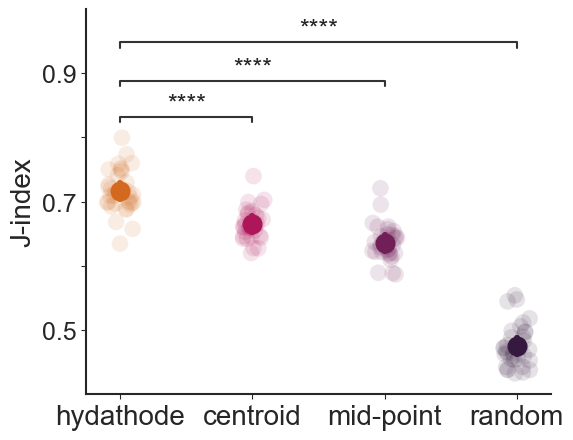

In [53]:
# plotting the subfigure for Voronoi II overlap:

fig, ax = plt.subplots(figsize = (6,5))

sns.stripplot (x = 'type', y = 'error', data = melted_J_mean_df, order = order, 
               palette = palette,
               alpha = .12, size = 12, zorder=1,
               ax = ax)


ax, test_results = add_stat_annotation(ax, data = melted_J_mean_df, x= 'type', y= 'error', order = order,
                    box_pairs = pairs,
                    perform_stat_test = False,
                    pvalues = pvalues,
                    loc='inside',
                    fontsize = 18)

x = list(range(4))

y_lower = [np.percentile(a = intercept, q = 2.5)] + np.percentile(a = slopes + intercept, axis = [0,1], q = 2.5).tolist()
y_higher = [np.percentile(a = intercept, q = 97.5)] + np.percentile(a = slopes + intercept, axis = [0,1], q = 97.5).tolist()
y = [az.summary(J_results)['mean']['Intercept'],
           az.summary(J_results)['mean']['Intercept'] + az.summary(J_results)['mean']['type[centroid]'],
           az.summary(J_results)['mean']['Intercept'] + az.summary(J_results)['mean']['type[mid-point]'],
           az.summary(J_results)['mean']['Intercept'] + az.summary(J_results)['mean']['type[random]']]
for i in range(4):
    ax.plot([x[i], x[i]], [y_lower[i], y_higher[i]],  c = colors[i], lw = 4.5)
for i in range(4):
    ax.scatter(x[i], y[i],  c = colors[i], s = 180, zorder = 2)

    
# ax.set_title('Voronoi I: angle test (n = 34)', fontsize = 15)
ax.set_xticklabels(['hydathode', 'centroid', 'mid-point', 'random'], fontsize = 20)
ax.set_xlabel(None)
ax.set_ylabel('J-index', fontsize = 20)
ax.set_yticks([.5, .6, .7,.8, .9])
ax.set_yticklabels(labels = [.5, None, .7, None, .9], fontsize = 18)

ax.set_ylim((0.4, 1))

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.setp(ax.spines.values(), linewidth=1.5)

plt.show()


-------

## Voronoi III test

In [92]:
predict_err_arr = np.zeros([34,4])

In [93]:
def center_error_gcc_best(sample):
    
    'helper function to streamline the Voronoi II test for a single sample'

    print(f'Predict center for {sample}  \n')

    G = graph_create.graph_creation(sample, dot_folder, vein_folder)

    adj_faces_mat, shared_edges_mat = voronoi_local.shared_edges(G, threshold = 50)
    rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat,G.graph['dots_passed'], G, dot_bool = True)
    cent_in_faces, mid_in_faces, rand_in_faces = voronoi_local.random_n_centroid(G)
    G_dual = graph_create.make_dual(G, cent_in_faces, mid_in_faces, rand_in_faces, rst[0])
    _, _, g_list, g_nodes_index = center_predict.slope_intercept_gcc(G, G_dual, shared_edges_mat, test_type= 'best')
    
    cent_list = [cent_in_faces[g_nodes_index[node]] for node in g_list]
    mid_list = [mid_in_faces[g_nodes_index[node]] for node in g_list ]
    rand_list = [rand_in_faces[g_nodes_index[node]] for node in g_list ]

    greatest_dual =  G_dual.subgraph(max(nx.connected_components(G_dual), key=len))
    
    mean_dist_rand, _ = center_predict.random_all(G, G_dual, greatest_dual, shared_edges_mat, g_list, g_list)
    cent_dist_rand, _ = center_predict.random_all(G, G_dual, greatest_dual, shared_edges_mat, g_list, cent_list)
    mid_dist_rand, _ = center_predict.random_all(G, G_dual, greatest_dual, shared_edges_mat, g_list, mid_list)
    rand_dist_rand, _ = center_predict.random_all(G, G_dual, greatest_dual, shared_edges_mat, g_list, rand_list)

    print(f'Center prediction done. \n')

    print(f'done with {sample}! ~~~~~~~~~~~~~~~~~~~~~~~~~ \n')

    return mean_dist_rand, cent_dist_rand, mid_dist_rand, rand_dist_rand

In [94]:
for i, sample in enumerate(sample_list):
    predict_err_arr[i] = center_error_gcc_best(sample)

Predict center for N1-1  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

done with N1-1! ~~~~~~~~~~~~~~~~~~~~~~~~~ 

Predict center for N1-2  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

done with N1-2! ~~~~~~~~~~~~~~~~~~~~~~~~~ 

Predict center for N1-3  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

done with N1-3! ~~~~~~~~~~~~~~~~~~~~~~~~~ 

Predict center for N1-4  

Creating graph f

../voronoi_local.py:24: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Center prediction done. 

done with N5-4! ~~~~~~~~~~~~~~~~~~~~~~~~~ 

Predict center for N5-5  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

done with N5-5! ~~~~~~~~~~~~~~~~~~~~~~~~~ 

Predict center for N6-1  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

done with N6-1! ~~~~~~~~~~~~~~~~~~~~~~~~~ 

Predict center for N6-2  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

done with N6-2! ~

In [95]:
predict_err_df = pd.DataFrame(predict_err_arr, index = sample_list, columns = ['hydathode','centroid','mid-point','random'])

We'll only solve the linear system that is over-overdetermined, i.e., that has unique solutions.

In [96]:
def size_M(sample):

    'function to determine the dim. of the linear system'

    print(f'Predict center for {sample}  \n')

    G = graph_create.graph_creation(sample, dot_folder, vein_folder)

    adj_faces_mat, shared_edges_mat = voronoi_local.shared_edges(G, threshold = 50)
    rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat,G.graph['dots_passed'], G, dot_bool = True)
    cent_in_faces, mid_in_faces, rand_in_faces = voronoi_local.random_n_centroid(G)
    G_dual = graph_create.make_dual(G, cent_in_faces, mid_in_faces, rand_in_faces, rst[0])
    s_list, _, g_list, _ = center_predict.slope_intercept_gcc(G, G_dual, shared_edges_mat)

    print(f'Center prediction done. \n')

    return len(s_list), len(g_list)

In [97]:
size_df = np.zeros([34,2]) 

for i, sample in enumerate(sample_list):
    size_df[i] = size_M(sample)

Predict center for N1-1  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for N1-2  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for N1-3  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for N1-4  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: mer

../voronoi_local.py:24: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for N6-1  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for N6-2  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for N6-4  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for N2-4  

Creatin

In [103]:
# we only want num equations > num variables.
drop = predict_err_df.iloc[np.where(size_df[:, 0] <= size_df[:, 1])[0][0]].name
predict_err_df = predict_err_df.drop(index = drop) 
samples.index = samples[0]
samples_gcc = samples.drop(index = drop)

In [119]:
# set up for Bayesian mixture model
predict_err_df['plant'] = samples_gcc[1].tolist()
predict_err_df['sample'] = predict_err_df.index

In [120]:
melted_predict_err_df = predict_err_df.melt(id_vars= ['sample', 'plant'] , var_name='type', value_name= 'error')
melted_predict_err_df["type"]  = pd.Categorical(melted_predict_err_df["type"].tolist(), 
                   categories = ['hydathode','centroid','mid-point','random'], ordered=True)

In [121]:
pred_model= bmb.Model("error ~ type + (1|plant)", melted_predict_err_df, dropna=True, categorical = "type")
pred_results =pred_model.fit(chains=5, draws=2000)

Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 56 seconds.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6645, but should be close to 0.8. Try to increase the number of tuning steps.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


In [122]:
pred_results

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [123]:
az.summary(pred_results)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,150.457,21.701,108.435,190.465,0.578,0.461,1842.0,863.0,1.0
type[centroid],54.014,23.135,7.741,95.277,0.319,0.226,5260.0,5876.0,1.0
type[mid-point],67.826,23.096,22.765,109.825,0.333,0.236,4808.0,5312.0,1.0
type[random],155.925,23.580,111.718,200.192,0.329,0.233,5139.0,5106.0,1.0
1|plant_sigma,26.638,19.671,0.007,58.006,0.543,0.439,1579.0,1980.0,1.0
error_sigma,94.372,6.074,83.642,106.177,0.084,0.060,5396.0,2120.0,1.0
1|plant[1],6.379,19.368,-28.857,47.520,0.423,0.299,2326.0,1537.0,1.0
1|plant[2],13.153,20.457,-22.640,55.159,0.419,0.298,2572.0,2398.0,1.0
1|plant[3],-15.859,21.215,-61.193,17.652,0.545,0.491,2072.0,1326.0,1.0
1|plant[4],2.084,19.424,-37.436,39.330,0.404,0.314,2616.0,2289.0,1.0


In [124]:
slopes = pred_results.posterior.type.values
intercept = pred_results.posterior.Intercept.values
intercept = intercept.reshape((5,2000,1))

In [125]:
pvalues = [(slopes[:,:,0] <= 0).sum()/10000, (slopes[:,:,1] <= 0).sum()/10000, (slopes[:,:,2] <= 0).sum()/10000]
pairs = [('hydathode', 'centroid'), ('hydathode', 'mid-point'), ('hydathode', 'random')]

In [127]:
# unit conversion from pixel to mm
melted_predict_err_df['error_mm'] = melted_predict_err_df['error']/173.12

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

hydathode v.s. centroid: Custom statistical test, P_val:9.800e-03
hydathode v.s. mid-point: Custom statistical test, P_val:1.400e-03
hydathode v.s. random: Custom statistical test, P_val:0.000e+00


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


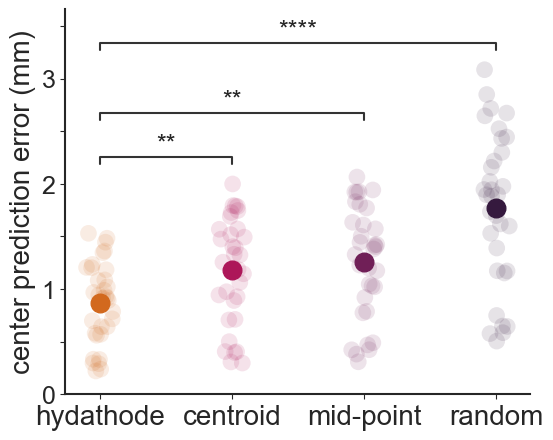

In [129]:
# plotting the subfigure for Voronoi III error:

fig, ax = plt.subplots(figsize = (6,5))

sns.stripplot (x = 'type', y = 'error_mm', data = melted_predict_err_df, order = order, 
               palette = palette,
               alpha = .12, size = 12, zorder=1,
               ax = ax)


ax, test_results = add_stat_annotation(ax, data = melted_predict_err_df, x= 'type', y= 'error_mm', order = order,
                    box_pairs = pairs,
                    perform_stat_test = False,
                    pvalues = pvalues,
                    loc='inside',
                    fontsize = 18)

x = list(range(4))

y_lower = [np.percentile(a = intercept, q = 2.5)] + np.percentile(a = slopes + intercept, axis = [0,1], q = 2.5).tolist()
y_higher = [np.percentile(a = intercept, q = 97.5)] + np.percentile(a = slopes + intercept, axis = [0,1], q = 97.5).tolist()
y = [az.summary(pred_results)['mean']['Intercept'],
           az.summary(pred_results)['mean']['Intercept'] + az.summary(pred_results)['mean']['type[centroid]'],
           az.summary(pred_results)['mean']['Intercept'] + az.summary(pred_results)['mean']['type[mid-point]'],
           az.summary(pred_results)['mean']['Intercept'] + az.summary(pred_results)['mean']['type[random]']]
for i in range(4):
    ax.plot([x[i], x[i]], [y_lower[i], y_higher[i]],  c = colors[i], lw = 4.5)
for i in range(4):
    ax.scatter(x[i], y[i]/173.12,  c = colors[i], s = 180, zorder = 2)

    
# ax.set_title('Voronoi I: angle test (n = 34)', fontsize = 15)
ax.set_xticklabels(['hydathode', 'centroid', 'mid-point', 'random'], fontsize = 20)
ax.set_xlabel(None)
ax.set_ylabel('center prediction error (mm)', fontsize = 20)
ax.set_yticks([0, .5, 1, 1.5, 2, 2.5, 3, 3.5])
ax.set_yticklabels(labels = [0, None, 1, None, 2, None, 3, None], fontsize = 18)


# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.setp(ax.spines.values(), linewidth=1.5)
å
plt.show()

